In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
#df = pd.read_csv("quiz_df.csv")
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


Question 1

If you’re given two lists:A = [1,2,3,4,5,6], B = [13, 21, 34]

The task is to create a list with the elements of A and B in a single dimension with output:

A_B = [1,2,3,4,5,6,13, 21, 34]

Which of the following option is the best way to create this list?

In [1]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [4]:
#Question 2
#How do you create an identity matrix in python?
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
#Question 3
#Which of the following fuel type code has the lowest average fuel cost per unit burned?

#what fuel type has the lcpub?
fuels = df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()
pd.DataFrame(fuels.sort_values())

#Ans: GAS

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
gas,13.659397
other,18.253856
waste,19.518122
coal,67.421830
oil,168.877086
nuclear,4955.157002


Text(0.5, 0, 'FUEL TYPE')

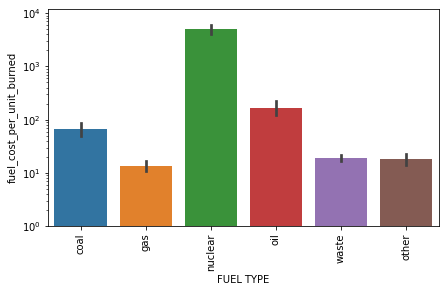

In [14]:
#Visual representaion of the above
plt.figure(figsize=(7,4))
plt.xticks(rotation = 90)

graph = sns.barplot(data = df, x='fuel_type_code_pudl', y='fuel_cost_per_unit_burned')
graph.set_yscale('log')
graph.set_ylim(1,12000)


plt.xlabel('FUEL TYPE')

In [12]:
#Question 4
#What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?
df.describe()

#std=10.60, 75th percentile=17.01

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [18]:
#Q5
#what is the skewness and kurtosis value for 'fuel_qty_burned' to 2dp

print('The skew value is: ', df.fuel_qty_burned.skew())
print('The kurtosis value is: ', df.fuel_qty_burned.kurtosis())


The skew value is:  15.851495469109503
The kurtosis value is:  651.3694501337732


In [20]:
#Question 6
#Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?
#(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)

dff = pd.read_csv('quiz_df.csv')
missing = dff.isnull().sum()
available = len(df.fuel_unit)
m_pct = (missing/available)*100
round(m_pct,3)
#Ans: Feature: fuel_unit, Total:180, Percent:0.610

record_id                       0.00
utility_id_ferc1                0.00
report_year                     0.00
plant_name_ferc1                0.00
fuel_type_code_pudl             0.00
fuel_unit                       0.61
fuel_qty_burned                 0.00
fuel_mmbtu_per_unit             0.00
fuel_cost_per_unit_burned       0.00
fuel_cost_per_unit_delivered    0.00
fuel_cost_per_mmbtu             0.00
dtype: float64

In [21]:
#Question 7 is theoritical

In [22]:
#Question 8
#Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?
a = df.corr()
ans = a.sort_values(by=('fuel_cost_per_unit_burned'),ascending = False)

ans 

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122


In [25]:
#Question 9
#For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?
av = pd.DataFrame(df.groupby(['report_year','fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean())
av = av.loc[1994:1998]
#av = av.unstack()
av

#From the analysis, we have that
new = 27.616234
old = 31.546467

#Also recall that percentage change is given by:
PC = ((new - old)/old)*100

PC

-12.458552014715313

In [40]:
#Question 10
#Which year had the highest average fuel cost_per_unit_delivered?

years = pd.DataFrame(df.groupby(['report_year'])['fuel_cost_per_unit_delivered'].mean())
years.sort_values(by='fuel_cost_per_unit_delivered', ascending = False)

#Ans: 1997

,fuel_cost_per_unit_delivered
report_year,
1997,11140.197239
1996,9196.705948
2000,985.362877
2009,652.694163
2018,499.269966
2015,326.535511
1998,287.154420
2014,192.737183
2013,172.307591
